<a href="https://colab.research.google.com/github/islam281/Ultimate-Customer-Churn-Prediction-Challenge/blob/main/Ultimate_Customer_Churn_Prediction_Challenge_tree_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import OneClassSVM
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid, train_test_split
from sklearn.decomposition import PCA
!pip install lightgbm --quiet
import lightgbm as lgb
!pip install xgboost --quiet
!pip install catboost --quiet
from catboost import CatBoostClassifier, Pool
import xgboost as xgb
!pip install shap --quiet
import shap
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.neighbors import NearestNeighbors, KNeighborsRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
!pip install category_encoders --quiet
import category_encoders as ce
from sklearn.svm import SVC
!pip install category_encoders


In [ ]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [ ]:
train['Churn'].value_counts()

,count
Churn,
0,5495
1,2505


In [ ]:

# ===============================================================
#  COPY DATA CLEAN (important to avoid old values)
# ===============================================================
train_fe = train.copy()
test_fe  = test.copy()


#=====================================================================
#nfeature engineering
#=====================================================================

train_fe["spending_Avr"] = train_fe["Monthly_Spending"] / train_fe["Account_Age_Months"].replace(0, 1)
test_fe["spending_Avr"] = test_fe["Monthly_Spending"] / test_fe["Account_Age_Months"].replace(0, 1)

#=====================================================================

train_fe["usage_per_month"] = train_fe["Total_Usage_Hours"] / train_fe["Account_Age_Months"].replace(0, 1)
test_fe["usage_per_month"] = test_fe["Total_Usage_Hours"] / test_fe["Account_Age_Months"].replace(0, 1)

#=====================================================================

threshold = train_fe["spending_Avr"].mean()
train_fe["high_spending"] = (train_fe["spending_Avr"] > threshold).astype(int)

test_threshold = test_fe["spending_Avr"].mean()
test_fe["high_spending"] = (test_fe["spending_Avr"] > test_threshold).astype(int)
#=====================================================================

#=====================================================================


train_fe["spending_without_discount"] = train_fe["Monthly_Spending"] * (1 - train_fe["Discount_Used"] / 100)
test_fe["spending_without_discount"]  = test_fe["Monthly_Spending"] * (1 - test_fe["Discount_Used"] / 100)

#=====================================================================

train_fe["satisfaction_low"] = (train_fe["Satisfaction_Score"] <= 3).astype(int)
test_fe["satisfaction_low"] = (test_fe["Satisfaction_Score"] <= 3).astype(int)
#=====================================================================

train_fe["satisfaction_medium"] = ((train_fe["Satisfaction_Score"] > 3) & (train_fe["Satisfaction_Score"] <= 7)).astype(int)
test_fe["satisfaction_medium"] = ((test_fe["Satisfaction_Score"] > 3) & (test_fe["Satisfaction_Score"] <= 7)).astype(int)
#=====================================================================

train_fe["satisfaction_high"] = (train_fe["Satisfaction_Score"] >= 8).astype(int)
test_fe["satisfaction_high"] = (test_fe["Satisfaction_Score"] >= 8).astype(int)
#=====================================================================


train_fe["spend_x_satisfaction"] = train_fe["Monthly_Spending"] * train_fe["Satisfaction_Score"]
test_fe["spend_x_satisfaction"] = test_fe["Monthly_Spending"] * test_fe["Satisfaction_Score"]

#=====================================================================



#=====================================================================

train_fe["spending_Avr_log"] = np.log1p(train_fe["spending_Avr"])
test_fe["spending_Avr_log"]  = np.log1p(test_fe["spending_Avr"])

#=====================================================================


#=====================================================================



train_fe["total_calls_hours"] = train_fe["Total_Usage_Hours"] * (1 - train_fe["Streaming_Usage"] / 100)
test_fe["total_calls_hours"]  = test_fe["Total_Usage_Hours"]  * (1 - test_fe["Streaming_Usage"] / 100)


#=====================================================================

train_fe['high_usage'] = (train_fe['Total_Usage_Hours'] > train_fe['Total_Usage_Hours'].mean()).astype(int)
test_fe['high_usage']  = (test_fe['Total_Usage_Hours'] > test_fe['Total_Usage_Hours'].mean()).astype(int)

#=====================================================================

''' train_fe['low_usage']=(train_fe['Total_Usage_Hours']<train_fe['Total_Usage_Hours'].mean().astype(int))
test_fe['low_usage']=(test_fe['Total_Usage_Hours']<test_fe['Total_Usage_Hours'].mean().astype(int)) '''


#=====================================================================




#=====================================================================



train_fe["risk_score"] = (
        0.25 * train_fe["Support_Calls"] +
        0.30 * train_fe["Complaint_Tickets"] +
        0.15 * train_fe["Late_Payments"] -
        0.20 * train_fe["Satisfaction_Score"]
    )
test_fe["risk_score"] = (
        0.25 * test_fe["Support_Calls"] +
        0.30 * test_fe["Complaint_Tickets"] +
        0.15 * test_fe["Late_Payments"] -
        0.20 * test_fe["Satisfaction_Score"]
    )
#=====================================================================


train_fe["loyalty_score"] = train_fe["Account_Age_Months"] * train_fe["Satisfaction_Score"]
test_fe["loyalty_score"] = test_fe["Account_Age_Months"] * test_fe["Satisfaction_Score"]
#=====================================================================

train_fe['Total_Issues'] = train_fe['Support_Calls'] + train_fe['Complaint_Tickets']
test_fe['Total_Issues'] = test_fe['Support_Calls'] + test_fe['Complaint_Tickets']
#=====================================================================







In [ ]:
train.columns

Index(['Customer_ID', 'Age', 'Gender', 'Location', 'Subscription_Type',
       'Account_Age_Months', 'Monthly_Spending', 'Total_Usage_Hours',
       'Support_Calls', 'Late_Payments', 'Streaming_Usage', 'Discount_Used',
       'Satisfaction_Score', 'Last_Interaction_Type', 'Complaint_Tickets',
       'Promo_Opted_In', 'Churn'],
      dtype='object')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer_ID            8000 non-null   int64  
 1   Age                    8000 non-null   int64  
 2   Gender                 8000 non-null   object 
 3   Location               8000 non-null   object 
 4   Subscription_Type      8000 non-null   object 
 5   Account_Age_Months     8000 non-null   int64  
 6   Monthly_Spending       8000 non-null   float64
 7   Total_Usage_Hours      8000 non-null   int64  
 8   Support_Calls          8000 non-null   int64  
 9   Late_Payments          8000 non-null   int64  
 10  Streaming_Usage        8000 non-null   int64  
 11  Discount_Used          8000 non-null   int64  
 12  Satisfaction_Score     8000 non-null   int64  
 13  Last_Interaction_Type  8000 non-null   object 
 14  Complaint_Tickets      8000 non-null   int64  
 15  Prom

In [ ]:
train.describe()

,Customer_ID,Age,Account_Age_Months,Monthly_Spending,Total_Usage_Hours,Support_Calls,Late_Payments,Streaming_Usage,Discount_Used,Satisfaction_Score,Complaint_Tickets,Promo_Opted_In,Churn
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,5000.50000,43.542250,30.163875,104.804641,254.326625,4.45325,1.99250,49.798000,49.428250,5.462375,1.970500,0.499750,0.313125
std,2309.54541,14.909242,16.942407,54.643255,140.855632,2.88892,1.39971,28.965468,28.662071,2.879865,1.413375,0.500031,0.463794
min,1001.00000,18.000000,1.000000,10.090000,10.000000,0.00000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,3000.75000,31.000000,15.000000,57.637500,133.000000,2.00000,1.00000,24.000000,25.000000,3.000000,1.000000,0.000000,0.000000
50%,5000.50000,44.000000,30.000000,104.690000,256.500000,4.00000,2.00000,51.000000,50.000000,5.000000,2.000000,0.000000,0.000000
75%,7000.25000,57.000000,45.000000,151.697500,376.000000,7.00000,3.00000,75.000000,74.000000,8.000000,3.000000,1.000000,1.000000
max,9000.00000,69.000000,59.000000,199.940000,499.000000,9.00000,4.00000,99.000000,99.000000,10.000000,4.000000,1.000000,1.000000


In [ ]:
num_cols = train_fe.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = train_fe.select_dtypes(exclude=[np.number]).columns.tolist()
cat_cols

['Gender', 'Location', 'Subscription_Type', 'Last_Interaction_Type']

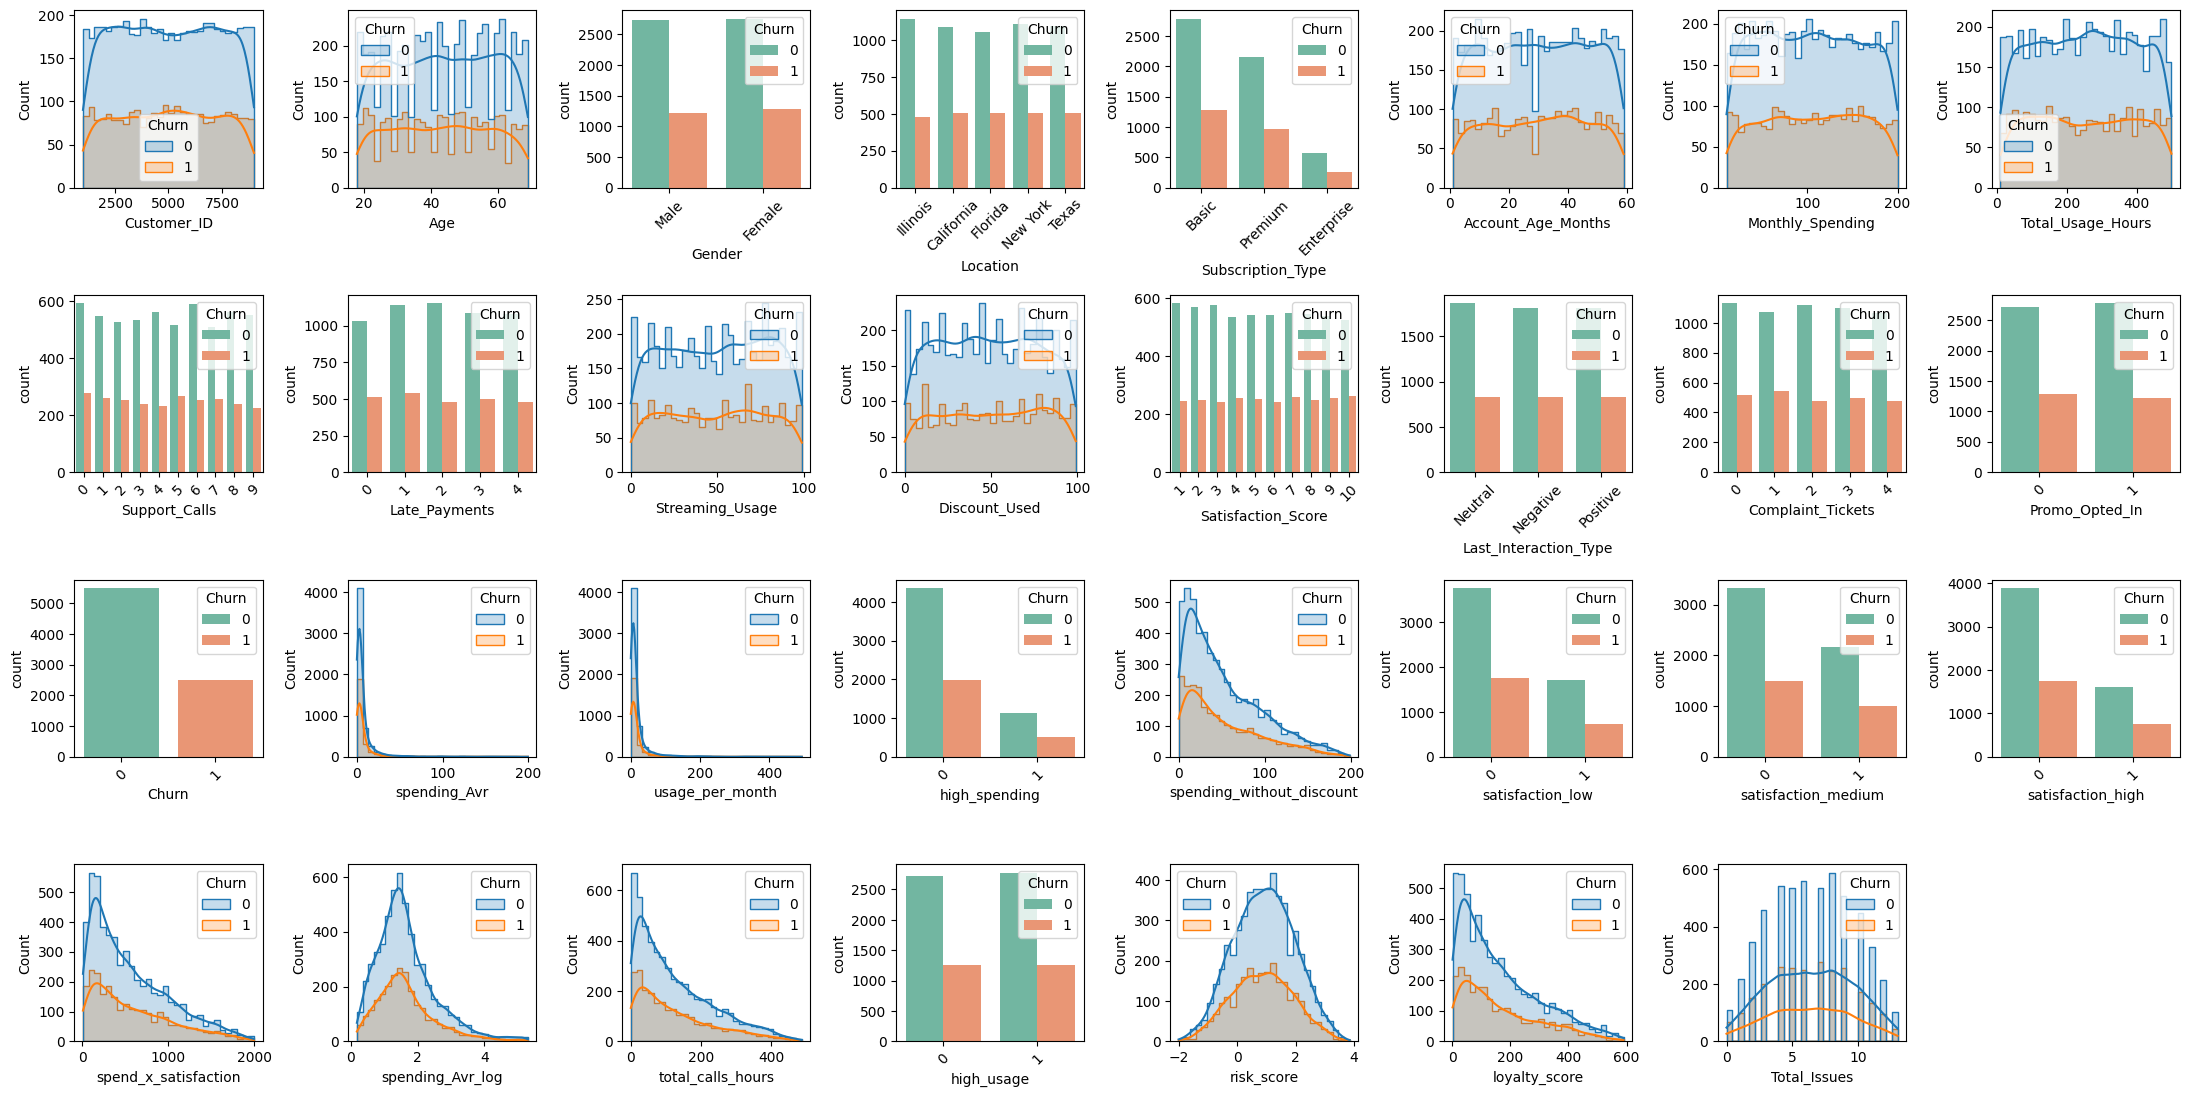

In [ ]:

plt.figure(figsize=(22, 22))

for idx, col in enumerate(train_fe.columns):
    plt.subplot(8, 8, idx + 1)

    # لو العمود Binary أو Categorical → Countplot
    if train_fe[col].nunique() <= 10:
        sns.countplot(x=train_fe[col], hue=train_fe['Churn'], palette='Set2')
        plt.xticks(rotation=45)

    else:
        # Numeric Continuous → Histogram
        sns.histplot(data=train_fe, x=col, hue="Churn", bins=30, kde=True, element="step")
        plt.xlabel(col)

    plt.tight_layout()

plt.show()

/tmp/ipython-input-3075626245.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=train_fe[col], hue=train_fe['Churn'], fill=True)


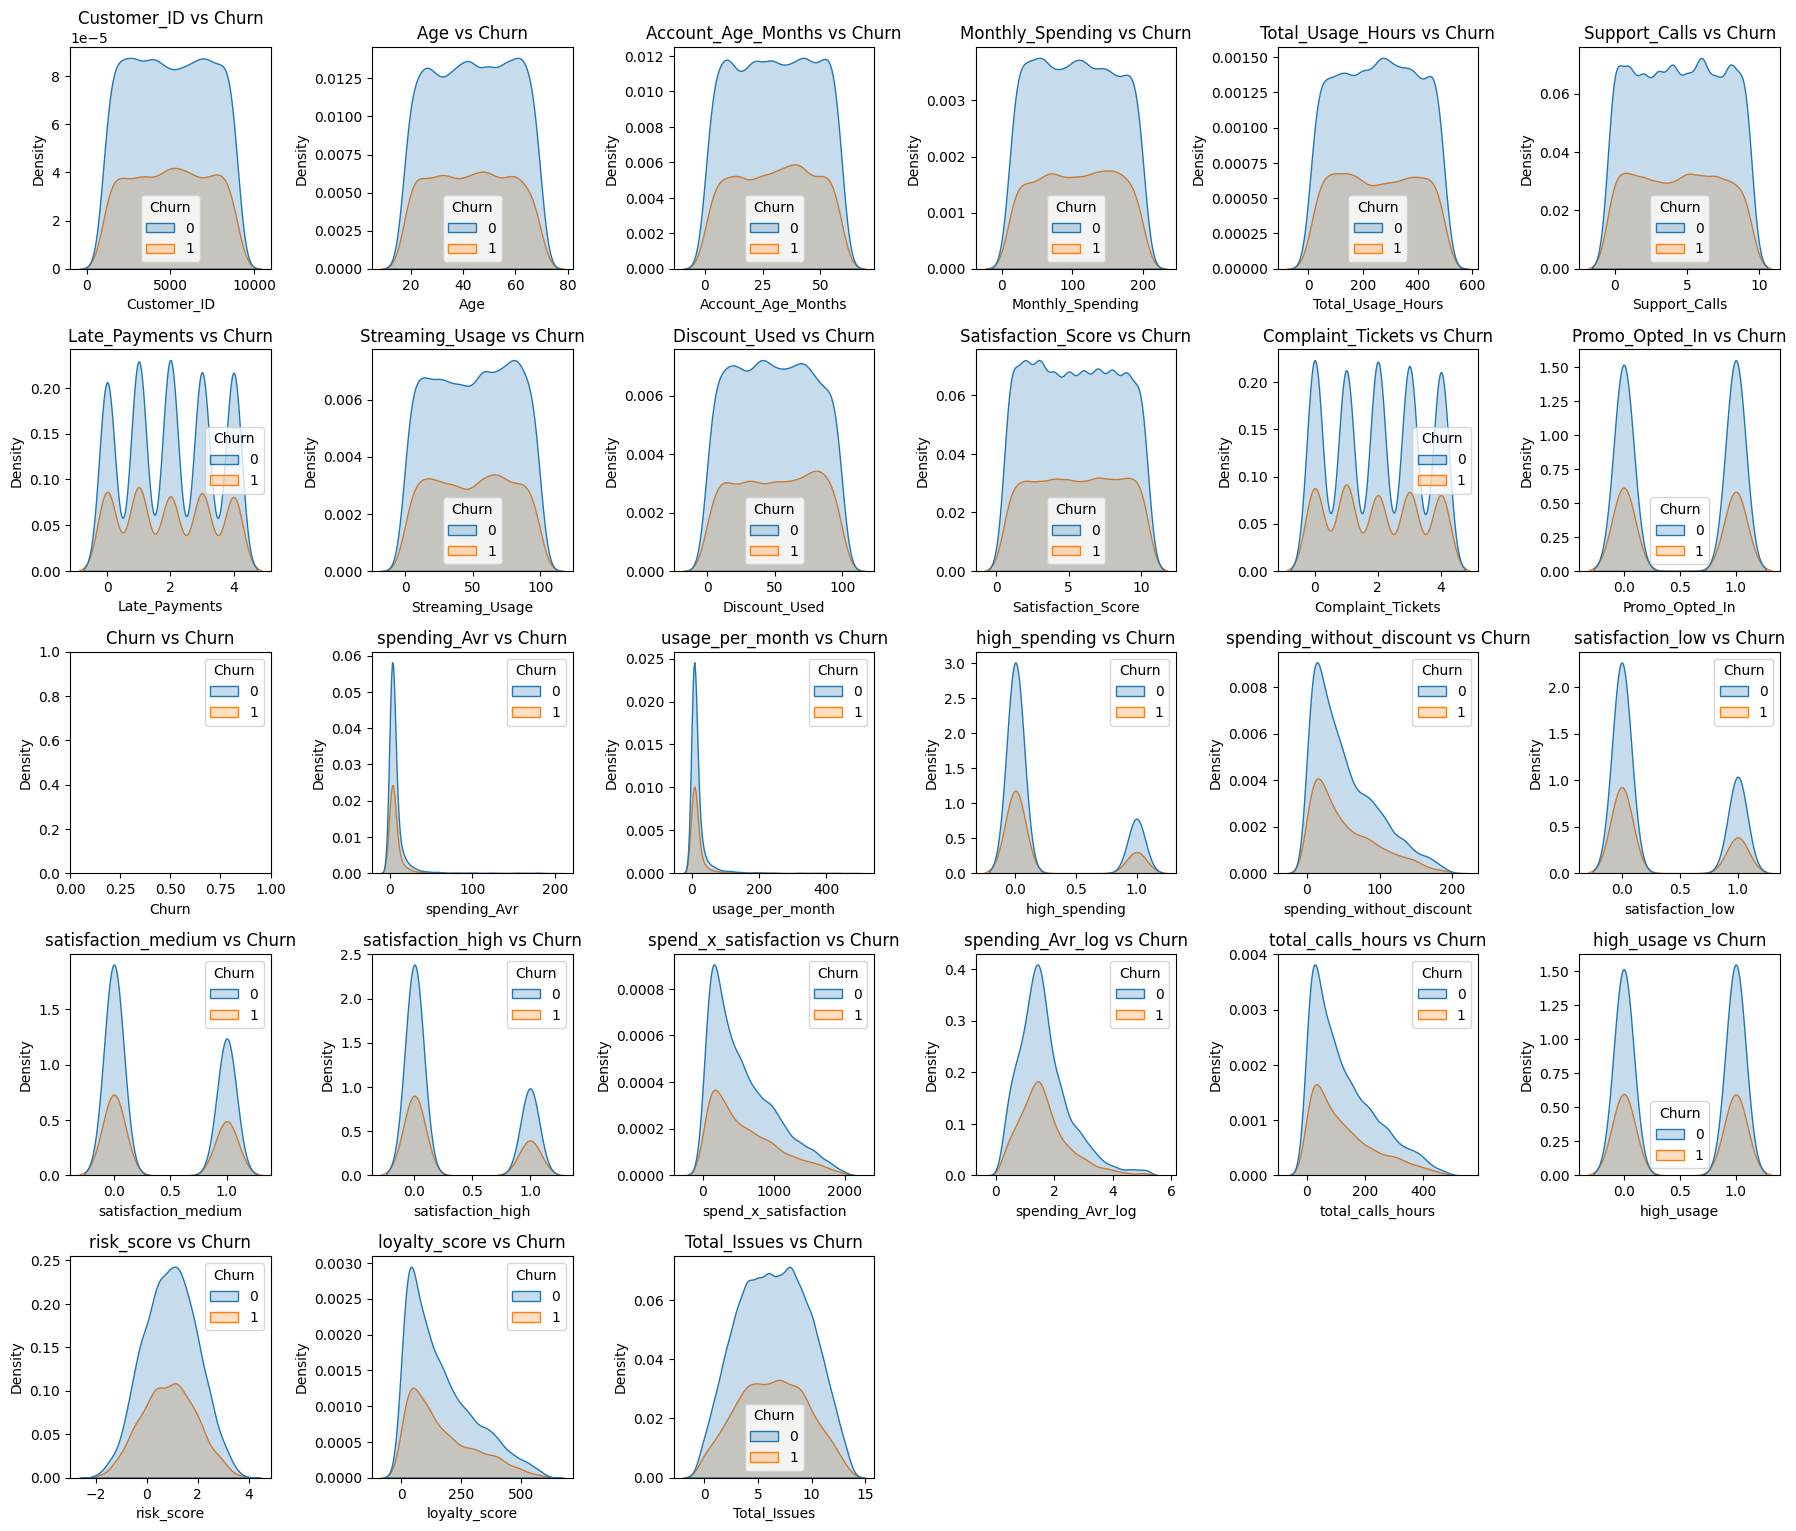

In [ ]:

# ===============================================================
#  Churn vs Numeric Features (Relationship)
# ===============================================================
plt.figure(figsize=(18, 18))
for i, col in enumerate(num_cols):
    plt.subplot(6, 6, i+1)
    sns.kdeplot(x=train_fe[col], hue=train_fe['Churn'], fill=True)
    plt.title(f"{col} vs Churn")
plt.tight_layout()
plt.show()

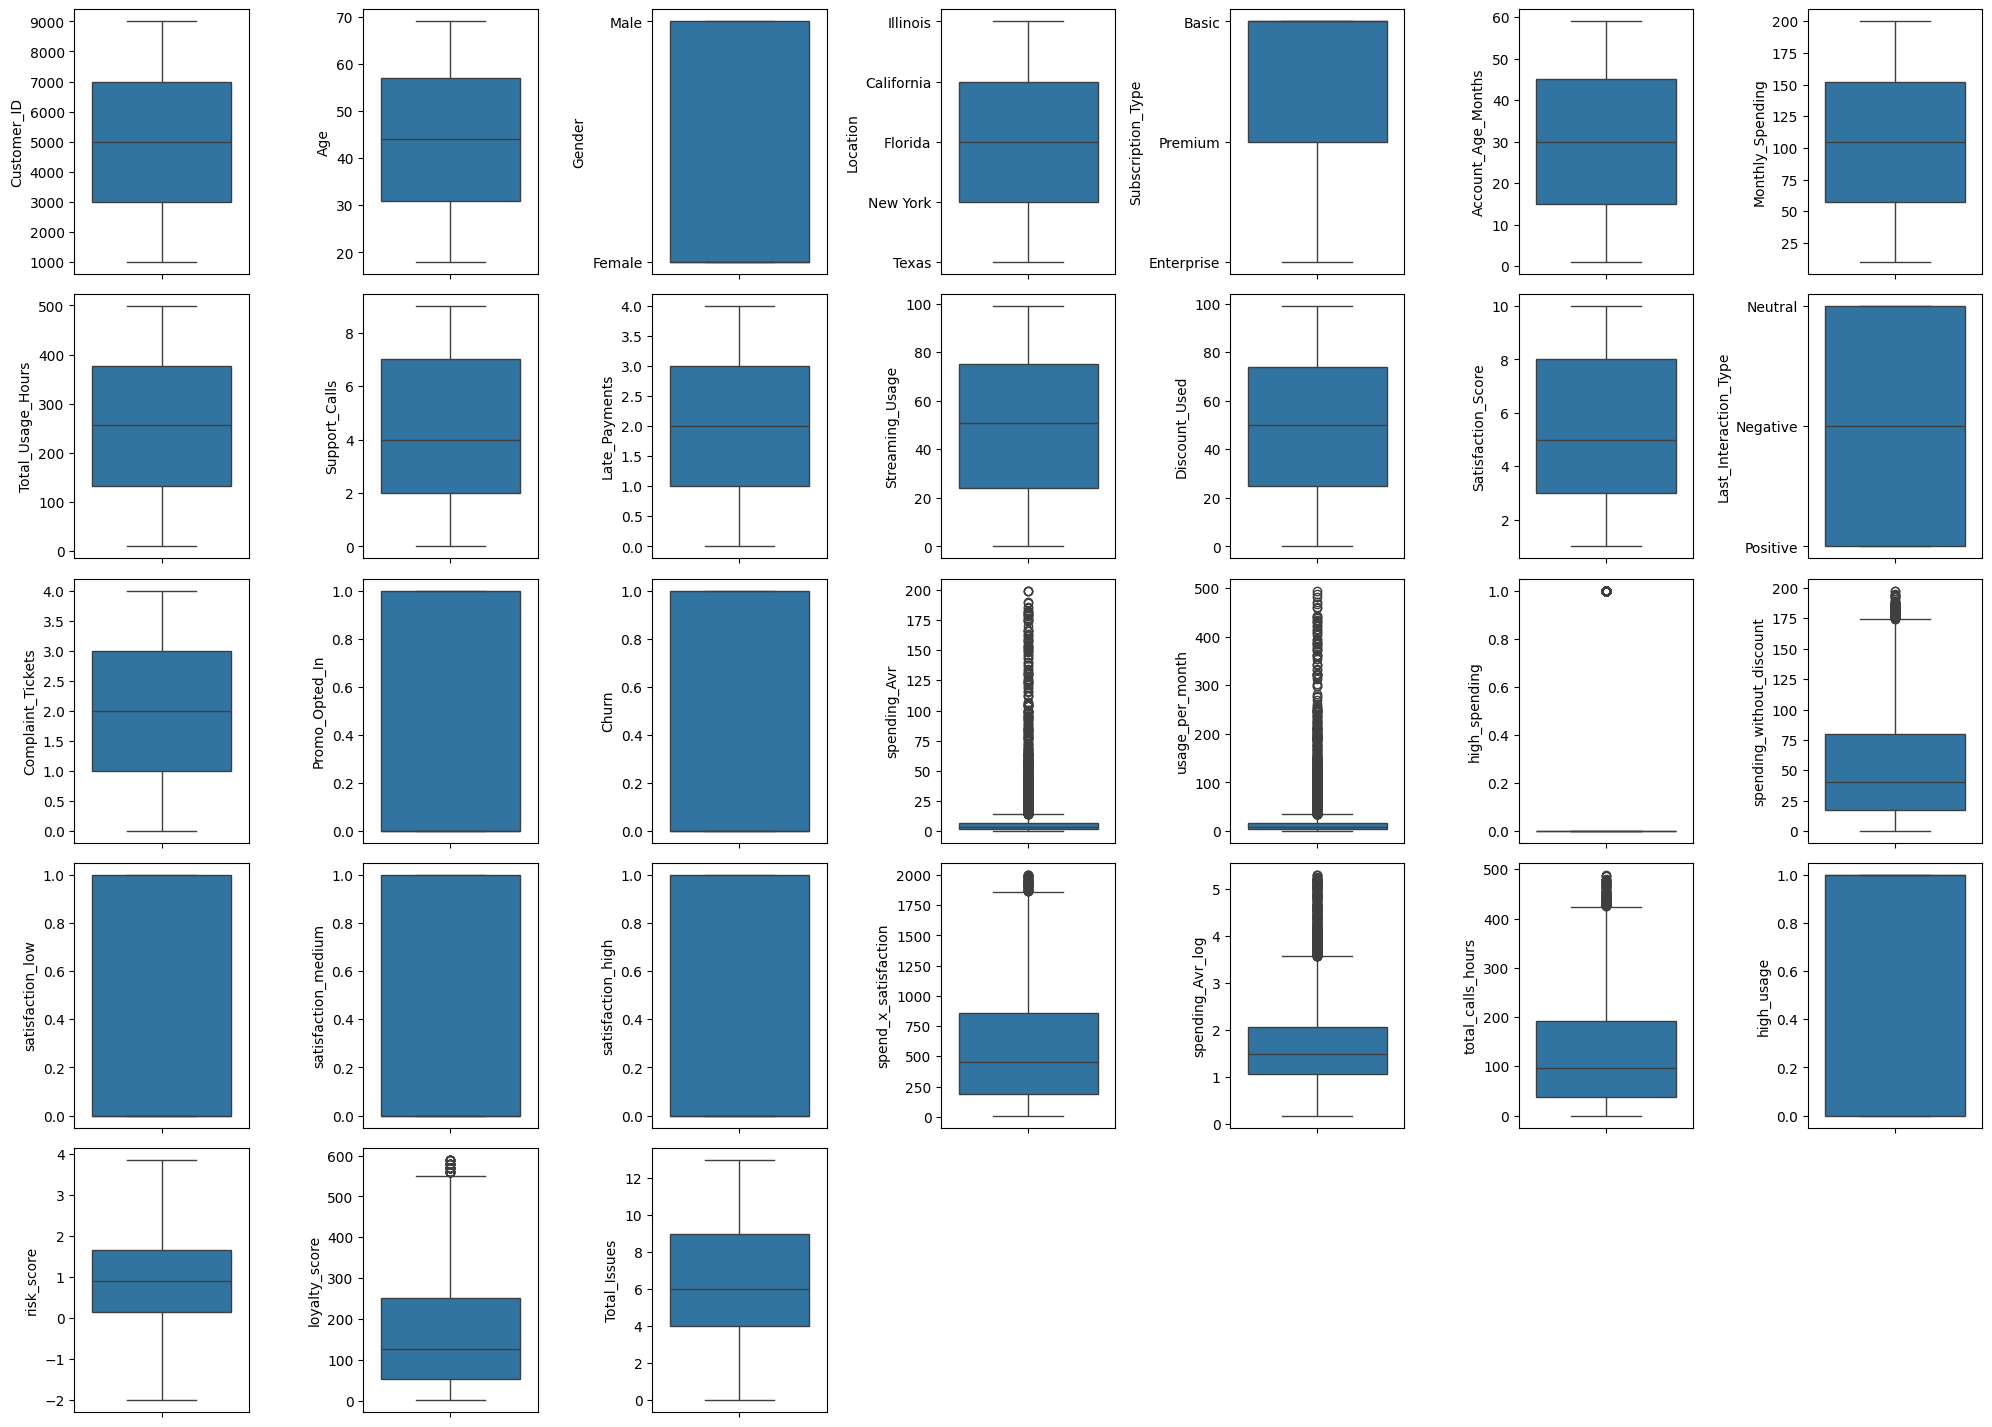

In [ ]:
fig=plt.figure(figsize=(20,20))

for index,col in enumerate(train_fe.columns):
    plt.subplot(7,7,index+1)
    sns.boxplot(train_fe[col])

plt.tight_layout(pad=1)

In [ ]:
# ===============================================================
#  ENCODING
# ===============================================================

train_fe['Gender'] = train_fe['Gender'].map({'Male': 1, 'Female': 0})
test_fe['Gender']  = test_fe['Gender'].map({'Male': 1, 'Female': 0})


#===============================================================



binary_cols = ["Discount_Used", "Promo_Opted_In"]
for col in binary_cols:
    train_fe[col] = train_fe[col].replace({"Yes":1, "No":0})
    test_fe[col]  = test_fe[col].replace({"Yes":1, "No":0})
#===============================================================



mapping = {
    'Negative': 0,
    'Neutral': 1,
    'Positive': 2
}

train_fe['Last_Interaction_Type'] = train_fe['Last_Interaction_Type'].map(mapping)
test_fe['Last_Interaction_Type']  = test_fe['Last_Interaction_Type'].map(mapping)

#===============================================================
train_fe = pd.get_dummies(train_fe, columns=['Subscription_Type'], drop_first=True)
test_fe  = pd.get_dummies(test_fe,  columns=['Subscription_Type'], drop_first=True)

#===============================================================

# Target Encoder
te = ce.TargetEncoder(
    cols=['Location'],
    smoothing=20   # مهم يقلل overfitting
)

# fit على train فقط
train_fe['Location_TE'] = te.fit_transform(
    train_fe['Location'],
    train_fe['Churn']
)

# transform على test
test_fe['Location_TE'] = te.transform(
    test_fe['Location']
)

# نشيل العمود الأصلي
train_fe.drop(columns=['Location'], inplace=True)
test_fe.drop(columns=['Location'], inplace=True)


#===============================================================

# مهم جدًا
test_fe = test_fe.reindex(columns=train_fe.columns, fill_value=0)


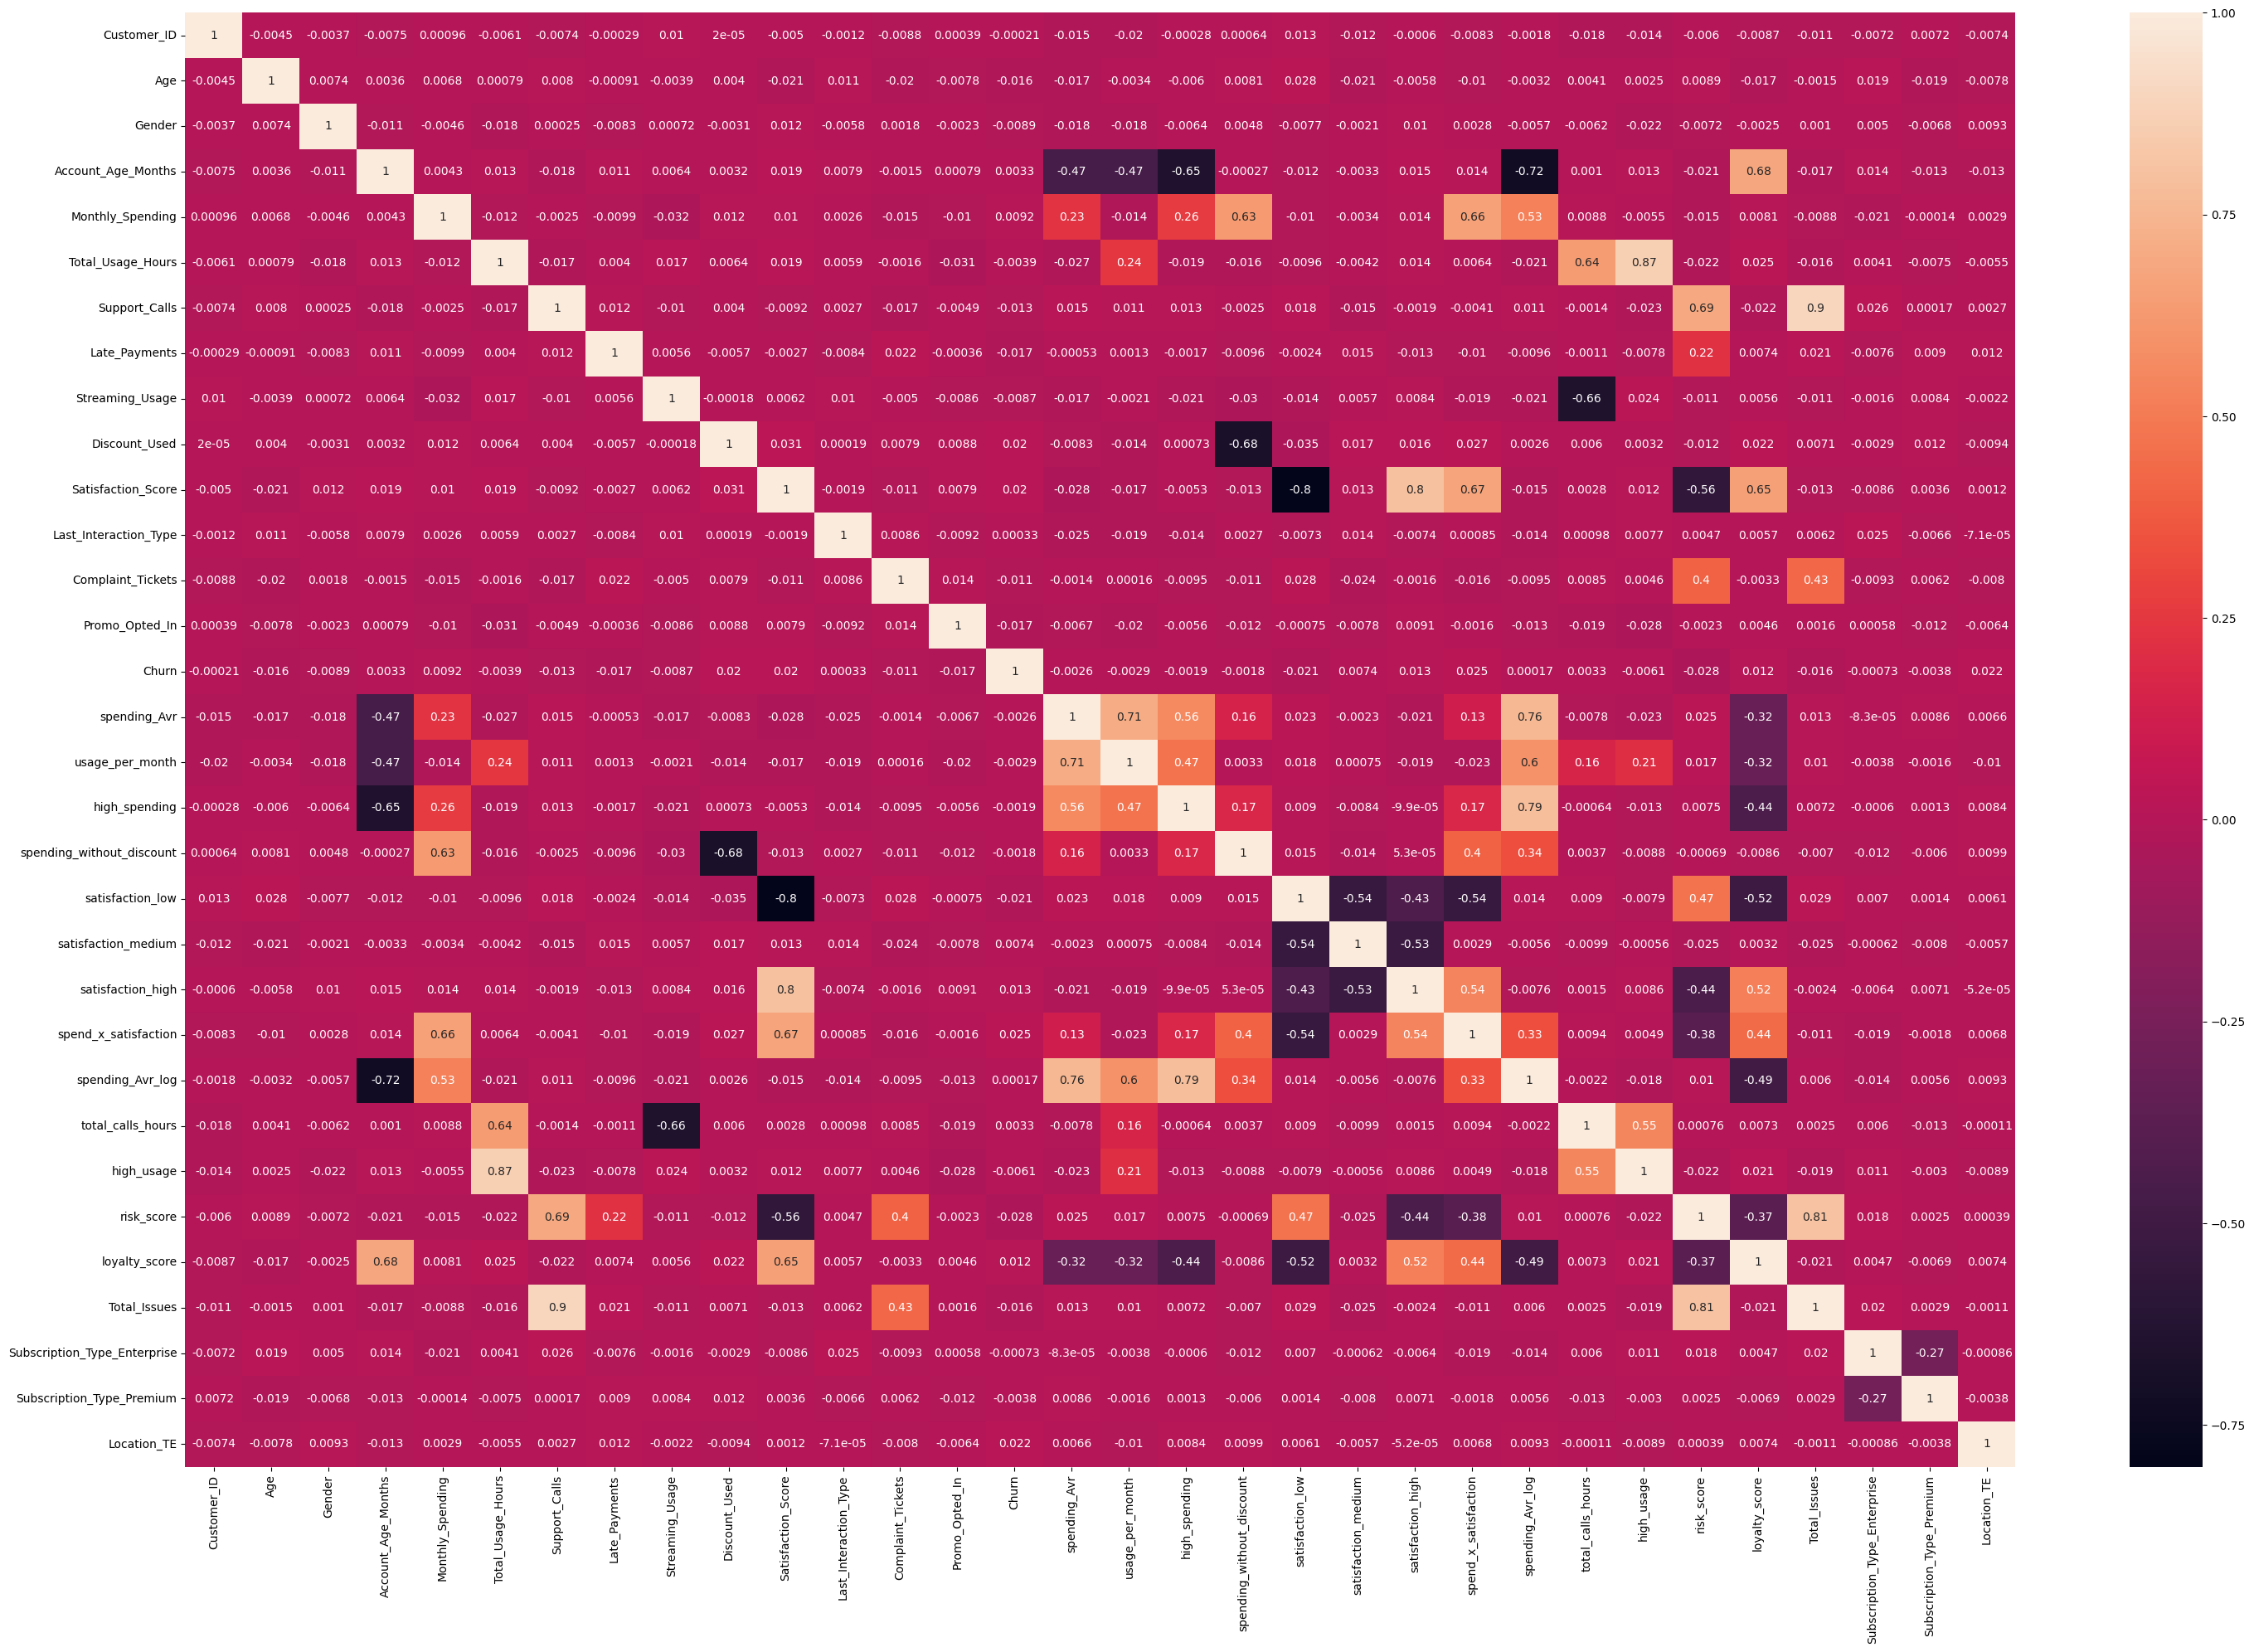

In [ ]:
fig=plt.figure(figsize=(30,20))
corr=train_fe.corr()
sns.heatmap(corr,annot=True)
fig.tight_layout(pad=1)

In [ ]:
# ===============================================================
# 2) FUNCTION: Replace Outliers with MEDIAN (IQR method)
# ===============================================================
def replace_outliers_with_median(df, exclude_cols=None):
    df = df.copy()
    if exclude_cols is None:
        exclude_cols = []

    num_cols = df.select_dtypes(include=[np.number]).columns
    num_cols = [c for c in num_cols if c not in exclude_cols]

    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        median = df[col].median()

        df.loc[(df[col] < lower) | (df[col] > upper), col] = median

    return df

# ===============================================================
# 3) APPLY OUTLIER HANDLING (BEFORE SPLIT)
# ===============================================================
exclude = ["Customer_ID", "Churn"]

train_fe = replace_outliers_with_median(train_fe, exclude_cols=exclude)
test_fe  = replace_outliers_with_median(test_fe,  exclude_cols=["Customer_ID"])

print("✅ Outliers replaced with MEDIAN successfully")


✅ Outliers replaced with MEDIAN successfully


/tmp/ipython-input-2897129317.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '256.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[col] < lower) | (df[col] > upper), col] = median
/tmp/ipython-input-2897129317.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '6.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[col] < lower) | (df[col] > upper), col] = median


In [ ]:
# ================================
# 1) Features requiring LOG TRANSFORM (skewed or uniform)
# ================================

log_features = [
    "Monthly_Spending",
    "Total_Usage_Hours",
    "Streaming_Usage",
    "spending_Avr",
    "usage_per_month",
    "spending_without_discount",
    "total_calls_hours",
]

# Apply safe log1p transform
for col in log_features:
    train_fe[col + "_log"] = np.log1p(train_fe[col].clip(lower=0))
    test_fe[col + "_log"]  = np.log1p(test_fe[col].clip(lower=0))
    train_fe.drop(columns=[col], inplace=True)
    test_fe.drop(columns=[col], inplace=True)


print("🔥 Log Transform Applied Successfully!")



🔥 Log Transform Applied Successfully!


In [ ]:
# ===============================================================
#  PREPARE X, y
# ===============================================================
y = train_fe["Churn"]
X = train_fe.drop(columns=["Customer_ID","Churn"])
test_final = test_fe.drop(columns=["Customer_ID","Churn"])

In [ ]:
train_fe.columns

Index(['Customer_ID', 'Age', 'Gender', 'Account_Age_Months', 'Support_Calls',
       'Late_Payments', 'Discount_Used', 'Satisfaction_Score',
       'Last_Interaction_Type', 'Complaint_Tickets', 'Promo_Opted_In', 'Churn',
       'high_spending', 'satisfaction_low', 'satisfaction_medium',
       'satisfaction_high', 'spend_x_satisfaction', 'spending_Avr_log',
       'high_usage', 'risk_score', 'loyalty_score', 'Total_Issues',
       'Subscription_Type_Enterprise', 'Subscription_Type_Premium',
       'Location_TE', 'Monthly_Spending_log', 'Total_Usage_Hours_log',
       'Streaming_Usage_log', 'usage_per_month_log',
       'spending_without_discount_log', 'total_calls_hours_log'],
      dtype='object')

/tmp/ipython-input-3628579356.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_fe[col])
/tmp/ipython-input-3628579356.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_fe[col])
/tmp/ipython-input-3628579356.py:5: UserWarning: 

`distplot` is a deprecated function and will be rem

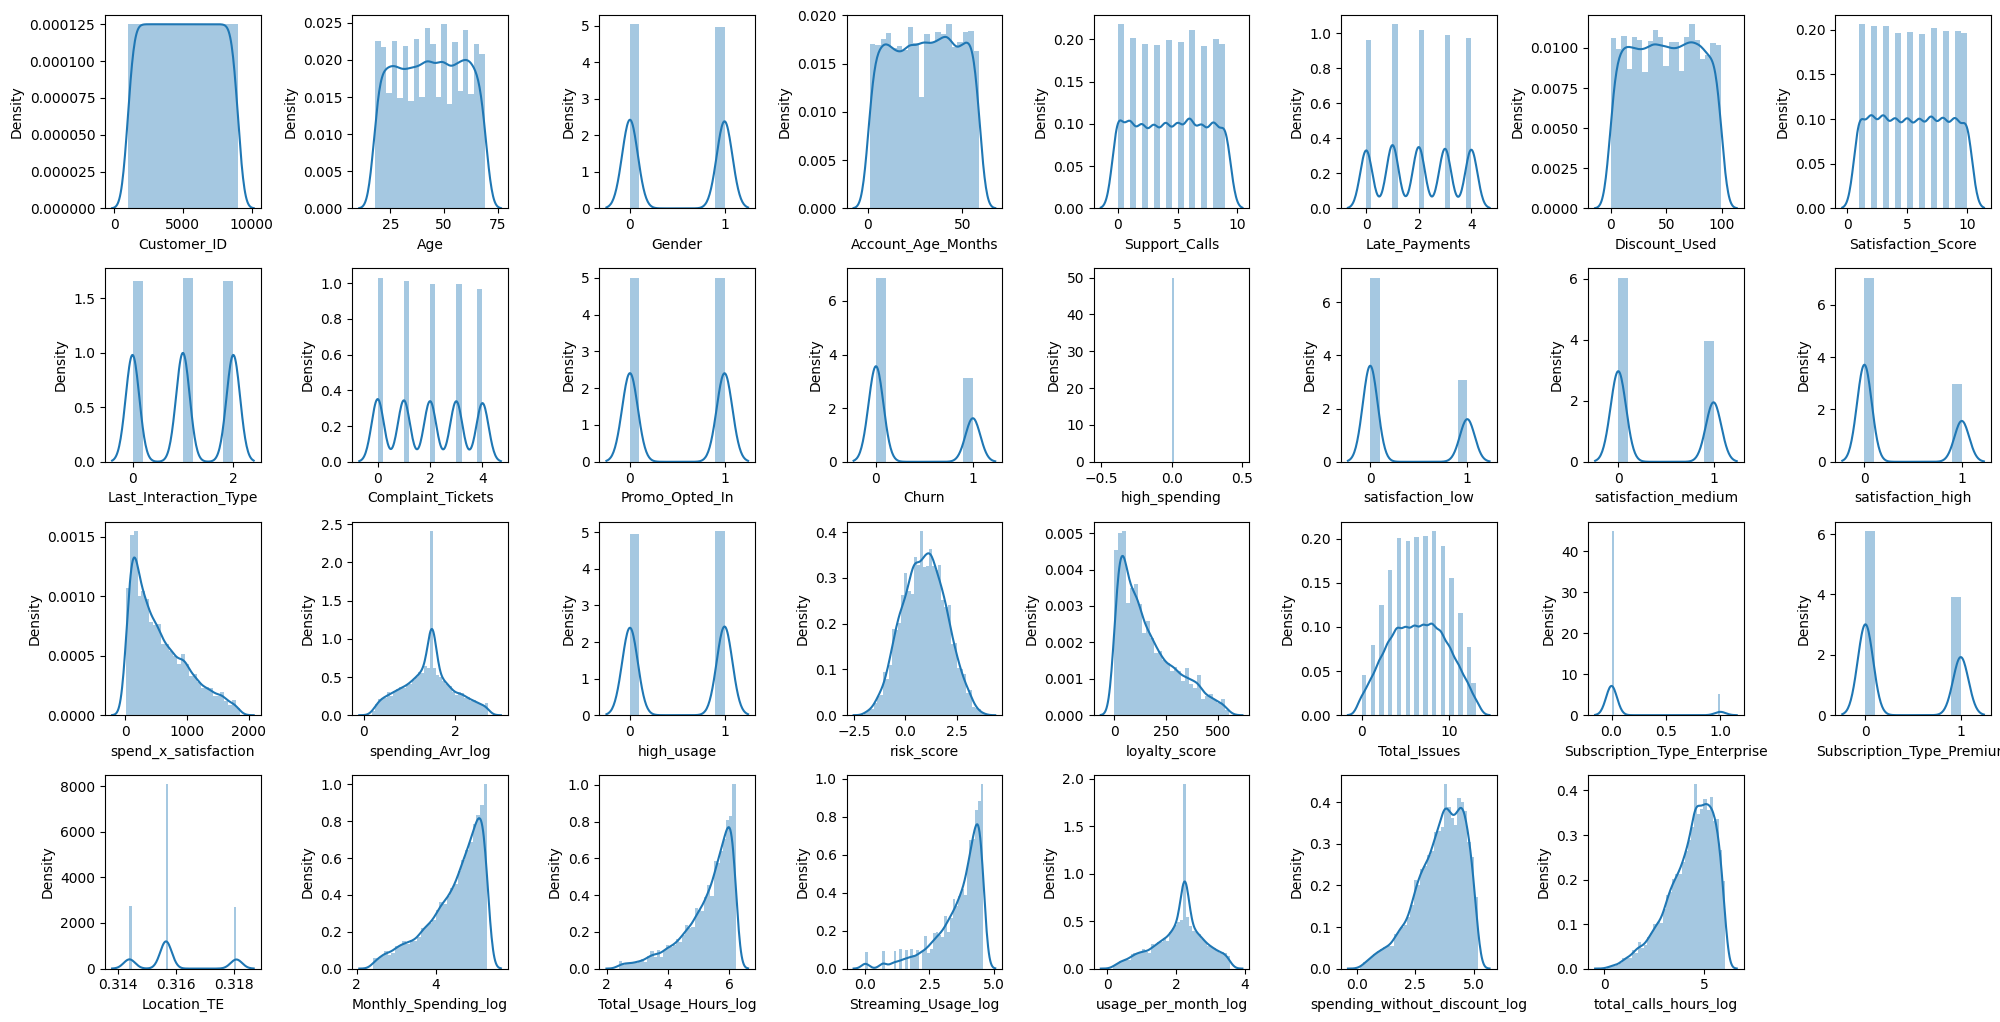

In [ ]:
fig=plt.figure(figsize=(20,20))

for index,col in enumerate(train_fe.columns):
    plt.subplot(8,8,index+1)
    sns.distplot(train_fe[col])

plt.tight_layout(pad=1)

In [ ]:
# ============================================
#  Split
# ============================================
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.1, random_state=42,stratify=y
)

In [ ]:


# ===============================================================
#  Train Random Forest
# ===============================================================
rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=10,
    min_samples_leaf=5,
    max_features="sqrt",
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)

rf.fit(X_train, y_train)

# ===============================================================
#  Threshold Tuning (F1)
# ===============================================================
val_proba = rf.predict_proba(X_val)[:, 1]

best_f1 = -1
best_th = 0.5

for th in np.arange(0.3, 0.7, 0.01):
    preds = (val_proba >= th).astype(int)
    f1 = f1_score(y_val, preds)
    if f1 > best_f1:
        best_f1 = f1
        best_th = th

print("🔥 Best Threshold:", best_th)
print("🔥 Best Validation F1:", best_f1)

# ===============================================================
#  Predict Test + Submission
# ===============================================================
test_proba = rf.predict_proba(test_final)[:, 1]
test_preds = (test_proba >= best_th).astype(int)

submission = pd.DataFrame({
    "Customer_ID": test["Customer_ID"],
    "Churn": test_preds
})

submission.to_csv("submission_random_forest.csv", index=False)
submission.head(20)


🔥 Best Threshold: 0.3
🔥 Best Validation F1: 0.47619047619047616


,Customer_ID,Churn
0,9001,1
1,9002,1
2,9003,1
3,9004,1
4,9005,1
5,9006,1
6,9007,1
7,9008,1
8,9009,1
9,9010,1


In [ ]:
# ===========================================================================================#
#                                           AdaBoost                                         #
# ===========================================================================================#




# ============================================
# 2) Train AdaBoost
# ============================================
ada = AdaBoostClassifier(

    n_estimators=400,
    learning_rate=0.01,
    algorithm="SAMME",        # أفضل من SAMME.R للـ classification
    random_state=42
)

ada.fit(X_train, y_train)

# ============================================
# 3) Threshold Tuning (F1 Optimization)
# ============================================
val_proba = ada.predict_proba(X_val)[:, 1]

best_f1 = -1
best_th = 0.50

thresholds = np.arange(0.3, 0.7, 0.01)

for th in thresholds:
    preds = (val_proba >= th).astype(int)
    score = f1_score(y_val, preds)
    if score > best_f1:
        best_f1 = score
        best_th = th

print("🔥 Best Threshold =", best_th)
print("🔥 Best F1 =", best_f1)
print("⚖ F1 @ 0.5 =", f1_score(y_val, (val_proba >= 0.5).astype(int)))

# ============================================
# 4) Predict TEST + Submission
# ============================================
test_proba = ada.predict_proba(test_final)[:, 1]
test_preds = (test_proba >= best_th).astype(int)

submission = pd.DataFrame({
    "Customer_ID": test["Customer_ID"],
    "Churn": test_preds
})

submission.to_csv("submission_ada_threshold.csv", index=False)
submission.head(20)


ValueError: Found input variables with inconsistent numbers of samples: [7200, 8000]

In [ ]:

# ====================================================
# 5) CatBoost Model
# ====================================================
cat_model = CatBoostClassifier(
    iterations=800,
    learning_rate=0.05,
    depth=6,
    eval_metric="F1",
    loss_function="Logloss",
    verbose=False,
    random_seed=42
)

cat_model.fit(
    X_train, y_train,
    eval_set=(X_val, y_val)
)

# ====================================================
# 6) Predict + Threshold Tuning
# ====================================================
val_proba = cat_model.predict_proba(X_val)[:, 1]


best_f1 = -1
best_th = 0.5

for th in np.arange(0.3, 0.7, 0.01):
    preds = (val_proba >= th).astype(int)
    score = f1_score(y_val, preds)
    if score > best_f1:
        best_f1 = score
        best_th = th

print("🔥 Best Threshold:", best_th)
print("🔥 Best F1:", best_f1)

# ====================================================
# 7) Final Prediction on Test
# ====================================================
final_proba = cat_model.predict_proba(test_final)[:, 1]
final_preds = (final_proba >= best_th).astype(int)

submission = pd.DataFrame({
    "Customer_ID": test_fe["Customer_ID"],
    "Churn": final_preds
})

submission.to_csv("CatBoost_PRO_Clean.csv", index=False)
print("✔ Saved: CatBoost_PRO_Clean.csv")
